In [7]:
import h5py
import librosa
import numpy as np

import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

file = h5py.File('dataset.h5', 'r')
#label_dict = {"['n']": 0, "['c']": 1, "['h']": 2, "['s']": 3,
 #             "['a']": 4, "['f']": 5, "['d']": 6, "['su']": 7}
#label_dict = {"[b'n']": 0, "[b'c']": 1, "[b'h']": 2, "[b'sa']": 3,
              #"[b'a']": 4, "[b'f']": 5, "[b'd']": 6, "[b'su']": 7}

In [10]:
#X, y = file['mel_spec'][:1000], file['label'][:1000]
labels = file['label'][:1000]
relevant_indexes =  np.where(np.logical_or(labels != 6, labels != 7))
print(relevant_indexes)
y = file['label'][relevant_indexes]
X = file['mel_spec'][relevant_indexes]

#X_test, y_test = file['mfcc'][], file['label'][]
file['stft'].shape

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

TypeError: Only one indexing vector or array is currently allowed for fancy indexing

In [ ]:
labels = file['label'][:36406]
relevant_indexes =  np.where(np.logical_or(labels != 6, labels != 7))
y = file['label'][relevant_indexes]
X = file['mel_spec'][relevant_indexes]

In [44]:
y.shape

(30000, 1)

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_deltas, y, test_size=0.33, random_state=42)

array([5], dtype=int64)

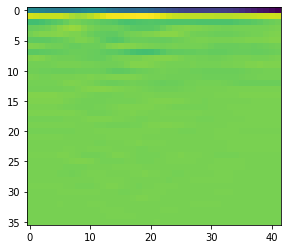

In [47]:
plt.imshow(X_train[6])
y_train[6]

In [48]:

model = Sequential()

model.add(tf.keras.layers.Reshape((36, 42, 1), input_shape=(36,42)))
model.add(Conv2D(128, (6,6),padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3),padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='sigmoid'))
#model.add(Dense(8, activation='softmax'))

#model = Sequential()
#model.add(tf.keras.layers.Reshape((12, 42, 1), input_shape=(12,42)))
#model.add(Conv2D(128, 5,padding='same',
                 #input_shape=(12,42)))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(MaxPooling2D(pool_size=(8)))
#model.add(Conv2D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.1))
#model.add(Flatten())
#model.add(Dense(8))
#model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 36, 42, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 36, 42, 128)       4736      
                                                                 
 activation_9 (Activation)   (None, 36, 42, 128)       0         
                                                                 
 dropout_9 (Dropout)         (None, 36, 42, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 18, 21, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 18, 21, 128)       147584    
                                                      

In [50]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [51]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [52]:
cnnhistory=model.fit(X_train, y_train, batch_size=1024, epochs=40,validation_data=(X_test, y_test), verbose=1)


Epoch 1/40
20/20 [==============================] - 136s 7s/step - loss: 13.1263 - accuracy: 0.1582 - val_loss: 3.0655 - val_accuracy: 0.1689
Epoch 2/40
20/20 [==============================] - 133s 7s/step - loss: 2.5026 - accuracy: 0.2078 - val_loss: 1.8255 - val_accuracy: 0.2738
Epoch 3/40
20/20 [==============================] - 135s 7s/step - loss: 2.1085 - accuracy: 0.2556 - val_loss: 1.6774 - val_accuracy: 0.3278
Epoch 4/40
20/20 [==============================] - 133s 7s/step - loss: 4.9506 - accuracy: 0.2756 - val_loss: 2.3049 - val_accuracy: 0.2182
Epoch 5/40
20/20 [==============================] - 133s 7s/step - loss: 2.8590 - accuracy: 0.2990 - val_loss: 6.0440 - val_accuracy: 0.2295
Epoch 6/40
20/20 [==============================] - 140s 7s/step - loss: 3.1553 - accuracy: 0.3126 - val_loss: 1.4864 - val_accuracy: 0.4240
Epoch 7/40
20/20 [==============================] - 140s 7s/step - loss: 2.3557 - accuracy: 0.3447 - val_loss: 1.4820 - val_accuracy: 0.4151
Epoch 8/40
2

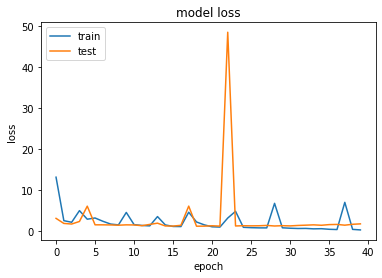

In [53]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

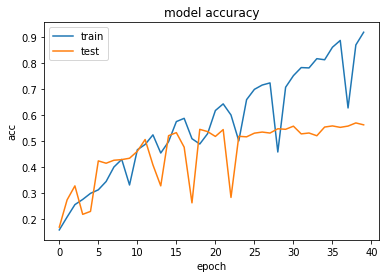

In [54]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
import os
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = 'C:\\Users\\Admin\\Documents\\GitHub\\VocalEmotionSensor'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)


Saved trained model at /content/drive/My Drive/Ravdess_model\Emotion_Voice_Detection_Model.h5 
